# Optimisation: PSO

This example shows you how to run a global optimisation with [PSO (particle swarm optimisation)](http://pints.readthedocs.io/en/latest/optimisers/pso.html).

For a more elaborate example of an optimisation, see: [basic optimisation example](./first-example.ipynb).

Minimising error measure
using Particle Swarm Optimisation (PSO)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      3.85e+07   0:00.0
1     12     3.85e+07   0:00.0
2     18     2.9e+07    0:00.0
3     24     2.31e+07   0:00.0
20    126    223714.2   0:00.1
40    246    223714.2   0:00.1
60    366    223714.2   0:00.1
80    486    123316.3   0:00.2
100   606    123316.3   0:00.2
120   726    123316.3   0:00.2
140   846    123316.3   0:00.2
160   966    123316.3   0:00.3
180   1086   123316.3   0:00.3
200   1206   123316.3   0:00.3
220   1326   123316.3   0:00.3
240   1446   123316.3   0:00.4
260   1566   123316.3   0:00.4
276   1656   123316.3   0:00.4
Halting: No significant change for 200 iterations.
Score at true solution: 
102854.433018
Found solution:          True parameters:
 1.48193947537603593e-02     1.49999999999999994e-02
 5.06338865329054215e+02     5.00000000000000000e+02


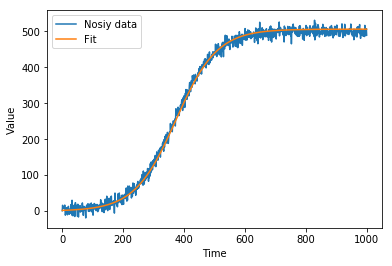

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])

# Perform an optimization with boundaries and hints
x0 = [0, 700]
found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.PSO,
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
pl.figure()
pl.xlabel('Time')
pl.ylabel('Value')
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()